# K-Means

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score
import pandas as pd

In [3]:
data_path = "F:\Omar 3amora\Heart_Disease_Project\Data\heart_disease_reduced_features.csv"
df = pd.read_csv(data_path)
X = df.drop(columns='num')
y_true = df['num']


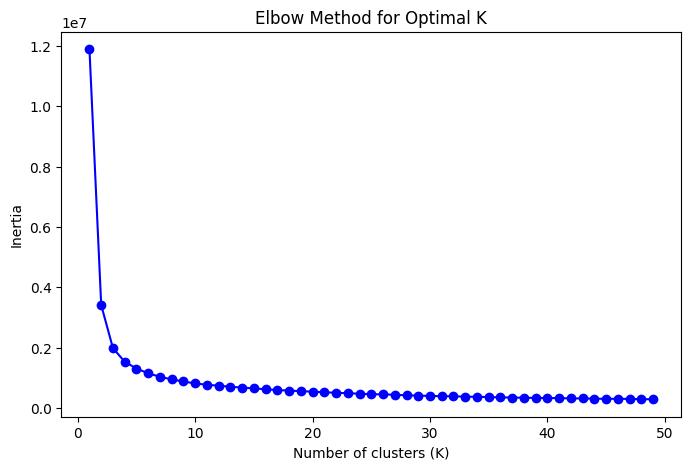

In [10]:

# Determine optimal K using Elbow Method
inertia = []
K_range = range(1, 50)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


In [13]:

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Compare clusters with true labels using Adjusted Rand Index
ari = adjusted_rand_score(y_true, kmeans_labels)
print(f"Adjusted Rand Index (K-Means vs True Labels): {ari:.4f}")


Adjusted Rand Index (K-Means vs True Labels): 0.0939


# Hierarchical Clustering

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

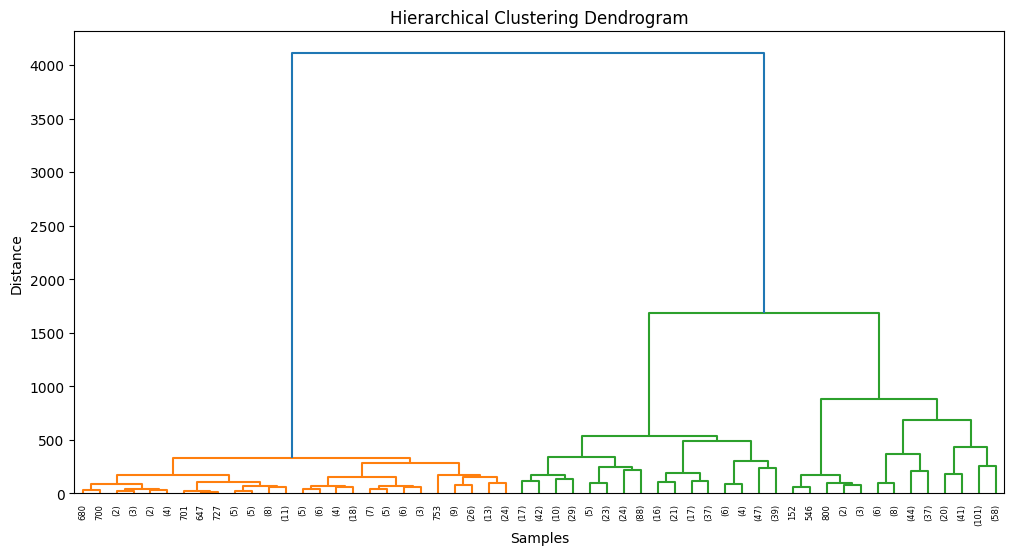

Adjusted Rand Index (Hierarchical vs True Labels): 0.0859


In [16]:
# Generate linkage matrix for dendrogram
linked = linkage(X, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Fit Agglomerative Clustering (choose n_clusters based on dendrogram)
agg = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
agg_labels = agg.fit_predict(X)

# Compare clusters with true labels
ari_agg = adjusted_rand_score(y_true, agg_labels)
print(f"Adjusted Rand Index (Hierarchical vs True Labels): {ari_agg:.4f}")